# Library Import

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import plotly.offline as pyoff
import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Dataset

In [137]:
df = pd.read_csv('..\Dataset\SuperStore - data.csv')
df = df.rename({'Country/Region': 'Country'}, axis=1)

In [138]:
df.duplicated().any()

True

In [139]:
# Checking duplicated row
df[df.duplicated()==True]
df.drop_duplicates(inplace=True)

In [140]:
# Check Dataset
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9993 non-null   object 
 1   Customer_ID    9993 non-null   object 
 2   Postal_Code    9993 non-null   int64  
 3   Product_ID     9993 non-null   object 
 4   Sales          9993 non-null   float64
 5   Quantity       9993 non-null   int64  
 6   Discount       9993 non-null   float64
 7   Profit         9993 non-null   float64
 8   Category       9993 non-null   object 
 9   Sub-Category   9993 non-null   object 
 10  Product_Name   9993 non-null   object 
 11  Order_Date     9993 non-null   object 
 12  Ship_Date      9993 non-null   object 
 13  Ship_Mode      9993 non-null   object 
 14  Customer_Name  9993 non-null   object 
 15  Segment        9993 non-null   object 
 16  Country        9993 non-null   object 
 17  City           9993 non-null   object 
 18  State        

In [142]:
# Simple Descriptive Analysis
df.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.567998,229.852846,3.789753,0.156188,28.660971
std,32065.085638,623.276074,2.225149,0.206457,234.271476
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [143]:
df.nunique()

Order_ID         5009
Customer_ID       793
Postal_Code       632
Product_ID       1862
Sales            5825
Quantity           14
Discount           12
Profit           7287
Category            3
Sub-Category       17
Product_Name     1817
Order_Date       1236
Ship_Date        1334
Ship_Mode           4
Customer_Name     793
Segment             3
Country             1
City              531
State              49
Region              4
dtype: int64

In [144]:
# we can see that the country column only has 1 value, so we can drop it
df.drop('Country', axis=1, inplace=True)

In [145]:
# Quantity Check
df = df[df['Quantity']>0]

In [146]:
# Datetime Format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [147]:
df['year'] = df['Order_Date'].apply(lambda x: x.year)
df['month'] = df['Order_Date'].apply(lambda x: x.month)

# Last Check Point

In [14]:
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,...,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Region,year,month
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,...,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,2019,11
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,...,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,2019,11
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,2019,6
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,...,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,2018,10
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,...,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,2018,10


In [17]:
df_2 = df.copy()
df_2.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,...,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Region,year,month
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,...,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,2019,11
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,...,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,2019,11
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,2019,6
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,...,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,2018,10
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,...,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,2018,10


In [18]:
print(len(df_2))
print(len(df_2[['Product_Name','Profit']][df_2['Profit']<0]))

print(len(df_2)-len(df_2[['Product_Name','Profit']][df_2['Profit']<0]))

9993
1870
8123


In [19]:
df_2['Shipping_Time'] = df_2['Ship_Date']-df_2['Order_Date']
df_2['Shipping_Time'] = df_2['Shipping_Time'].astype(str)
df_2['Shipping_Time'] = df_2['Shipping_Time'] .apply(lambda x: x.split(' ')[0])
df_2['Shipping_Time'] = df_2['Shipping_Time'].astype(int)

In [20]:
print(len(df_2))
print(len(df_2[['Product_Name','Profit']][df_2['Profit']<0]))

print(len(df_2)-len(df_2[['Product_Name','Profit']][df_2['Profit']<0]))

9993
1870
8123


In [21]:
df_2=df_2[['Sales', 'Quantity', 'Discount', 'Profit', 'Sub-Category', 'Segment', 'month']]

In [22]:
# Because we want to give a discount recommendation, we will use non negative profit 
df_2 = df_2[df_2['Profit']>0]

<Axes: >

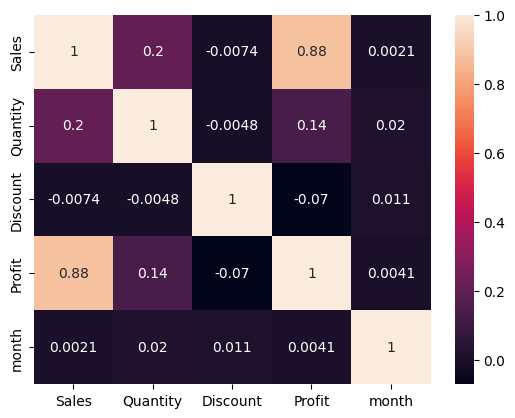

In [23]:
sns.heatmap(df_2.corr(numeric_only=True), annot=True)

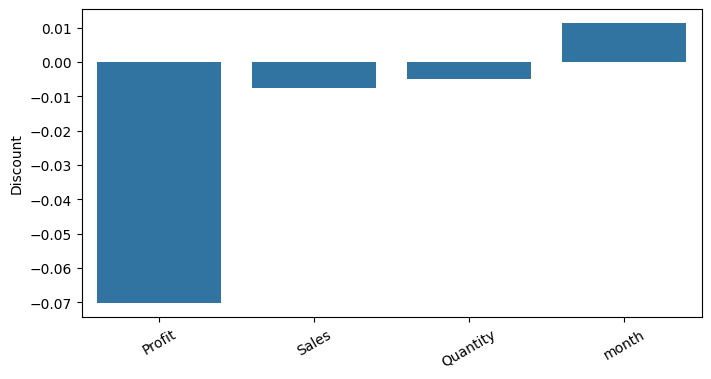

In [24]:
plt.figure(figsize=(8,4))
g = sns.barplot(df_2.corr(numeric_only=True)['Discount'].sort_values().drop('Discount'))
g.tick_params(axis='x', rotation=30)

<Axes: >

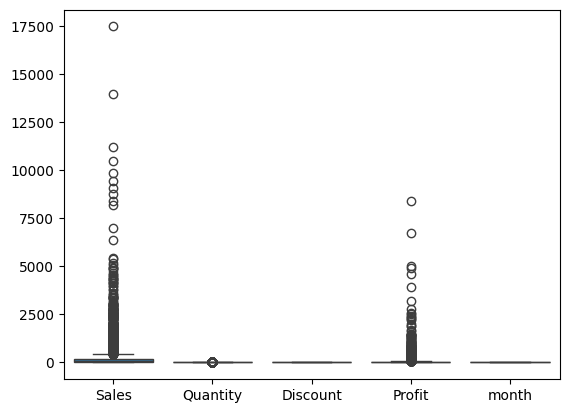

In [25]:
sns.boxplot(df_2)

In [26]:
print(np.std(df_2[['Sales','Profit']]))

# We can see from the sales and profit fields that the standard deviation is very high.
# Therefore, we will only use the sales and profit that have value under 2000
dftemp = df_2[(df_2['Sales']<500) & (df_2['Profit']<500)]

Sales     600.303389
Profit    213.700718
dtype: float64


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning:

The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



<Axes: >

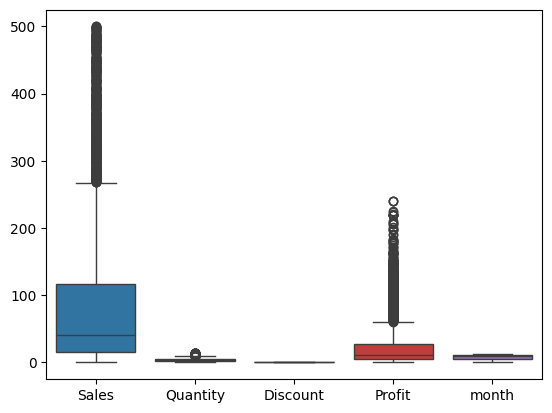

In [27]:
sns.boxplot(dftemp)

# New Version

In [86]:
df1 = df.copy()
df1.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,...,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,City,State,Region,year,month
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,...,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,2019,11
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,...,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,2019,11
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,2019,6
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,...,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,2018,10
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,...,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,2018,10


we want to build a discount recommendation system so by giving the right amount of discount, so we will use only the positive provite amount

In [87]:
#use only the positive profit
df1 = df1[df1['Profit']>0]

<Axes: >

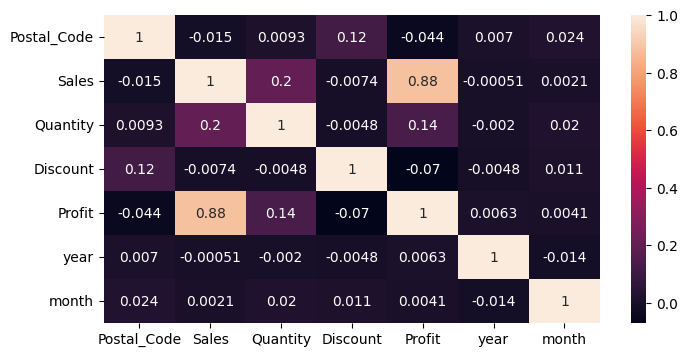

In [88]:
# Lets re do an exploratory data analysis to check our data
plt.figure(figsize=(8,4))
sns.heatmap(df1.corr(numeric_only=True), annot=True)

the correlation is so bad, we need to do some feature engineering process

<Axes: ylabel='Discount'>

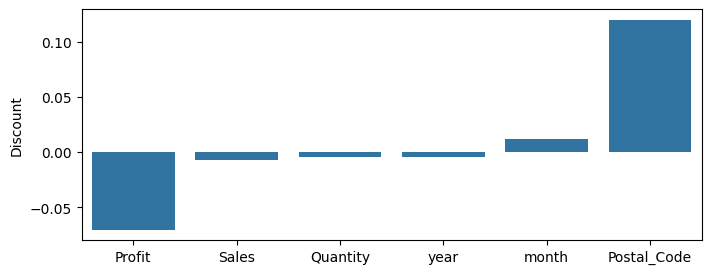

In [89]:
plt.figure(figsize=(8,3))
sns.barplot(df1.corr(numeric_only=True)['Discount'].sort_values().drop('Discount'))

In [148]:
dftemp = df1.copy()

In [149]:
# Adding new features
dftemp['Discount_Ratio'] = df['Discount']/df['Sales']
dftemp['Profit_Margin'] = df['Profit'] / df['Sales']

In [150]:
# First task, lets do some label encoding
# Sub-Cateogry
dftemp['Sub-Category'].nunique()
subcattemp = pd.get_dummies(dftemp['Sub-Category'], drop_first=True, dtype=int)
dftemp = pd.concat([dftemp, subcattemp], axis=1)

In [151]:
# Segment
dftemp['Segment'].nunique()
segmenttemp = pd.get_dummies(dftemp['Segment'], drop_first=True, dtype=int)
dftemp = pd.concat([dftemp, segmenttemp], axis=1)

In [152]:
dftemp.head(2)

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,...,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,Corporate,Home Office
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.96,2,0.0,41.9136,Furniture,Bookcases,...,0,0,0,0,0,0,0,0,0,0
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.94,3,0.0,219.5820,Furniture,Chairs,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

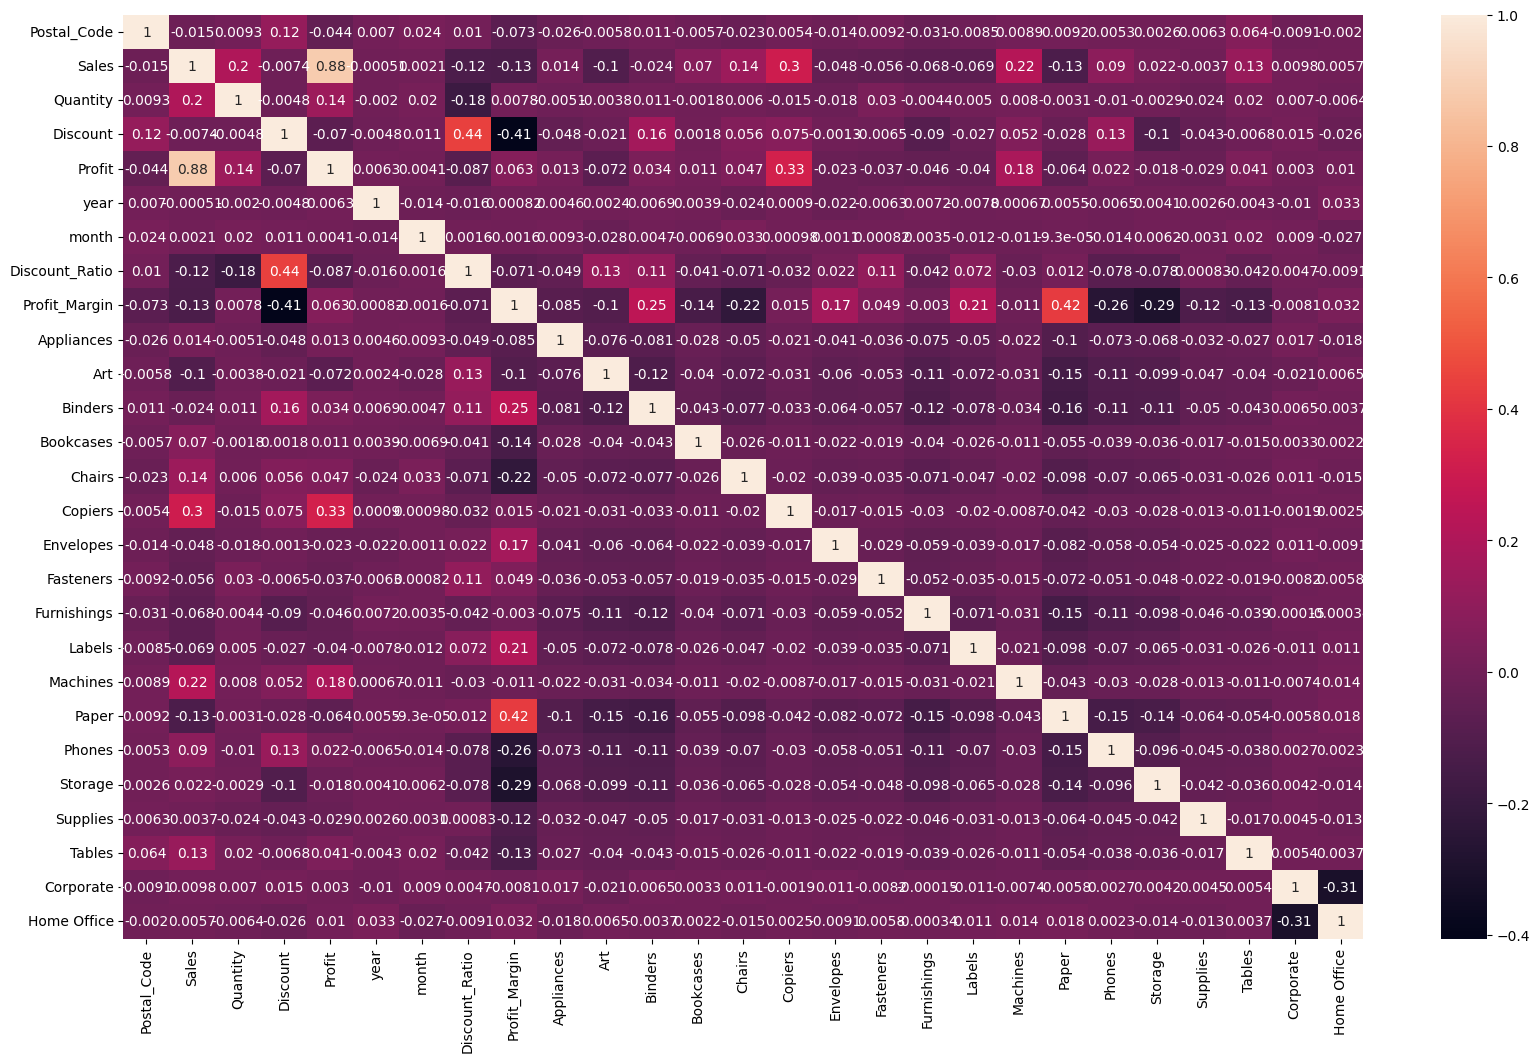

In [153]:
# Lets re do an exploratory data analysis to check our data
plt.figure(figsize=(20,12))
sns.heatmap(dftemp.corr(numeric_only=True),annot=True)

In [154]:
dftemp.drop(['Order_ID','Customer_ID','Product_ID','Postal_Code', 'Sub-Category', 'Product_Name', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name','Segment', 'City', 'State', 'Region', 'year', 'month','Category'],axis=1,inplace=True)

In [155]:
dftemp.head(2)

,Sales,Quantity,Discount,Profit,Discount_Ratio,Profit_Margin,Appliances,Art,Binders,Bookcases,...,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,Corporate,Home Office
0,261.96,2,0.0,41.9136,0.0,0.16,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,731.94,3,0.0,219.5820,0.0,0.30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
X = dftemp.drop(['Discount'],axis=1)
y = dftemp['Discount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [158]:
y_test_predict = model.predict(X_test)
print('Model_Test_Accuracy:',r2_score(y_test,y_test_predict))

Model_Test_Accuracy: 0.9894749500422407
